In [ ]:
class Empty(Exception):
    pass

#@title LinkedStack (pilas con listas enlazadas)
class LinkedStack:
    """LIFO Stack implementation using a singly linked list for storage"""

    class _Node:
        """Lightweight, nonpublic class for storing a singly linked node"""
        __slots__ = "_element", "_next"

        def __init__(self, element, next):
            self._element = element
            self._next = next

    def __init__(self):
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self, e):
        """Add element e to the top of the stack"""
        self._head = self._Node(e, self._head)
        self._size += 1

    def top(self):
        """Return the element at top of stack. Raise Empty Exception if stack empty"""
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._head._element

    def pop(self):
        """Remove and return the element from the top of the stack (i.e. LIFO)"""
        if self.is_empty():
            raise Empty('Stack is empty')
        elem = self._head._element
        self._head = self._head._next
        self._size -= 1
        return elem

    def imprimir(self):
        walk = self._head
        for i in range(len(self)):
            print(walk._element, end=" -> ")
            walk = walk._next

    def push_ordenado(self, elem):
        if self.is_empty() or self._head._element > elem:
          self.push(elem)
        else:
          walk = self._head

          while walk._next is not None and walk._next._element < elem:
              walk = walk._next

          new_node = LinkedStack()
          new_node.push(elem)

          new_node._head._next = walk._next
          walk._next = new_node._head
          self._size += 1

#Laboratorio 4
En este laboratorio, se llevará a cabo una medición experimental para determinar la complejidad temporal de la función a continuación. Se seguirán varios pasos para recopilar datos y analizar el comportamiento de esta función en función del tamaño de la entrada.

Use la implementación de **LinkedStack** dada.

**Pasos**
+ Paso 1: Generación de Listas Enlazadas Ordenadas.
Escriba una función denominada generar_lista(n) que devuelva una lista enlazada ordenada con n números aleatorios, cada uno en el rango de 1 a 10,000. Por Ejemplo: 3 -> 6 -> 1000.

+ Paso 2: Cálculo del Tiempo.
Desarrolle una función llamada calcular_tiempo(n) que genere 30 listas aleatorias de tamaño n y calcule el tiempo promedio que la función tarda en crear cada lista, utilizando la función time().

+ Paso 3: Creación de un DataFrame de Pandas.
Con los resultados obtenidos, se construirá un DataFrame de Pandas con dos columnas. La primera columna contendrá los valores de n, variando desde 1 hasta 10,000, y la segunda columna contendrá los valores de calcular_tiempo(n).

+ Paso 4: Diagrama de Puntos.
Se realizará un diagrama de dispersión utilizando el DataFrame anterior, con los valores de n en el eje X y el tiempo promedio en el eje Y.

+ Paso 5: Análisis de la Complejidad.
Compare el resultado del diagrama de puntos con la teoría vista en clase. ¿Tiene sentido?

In [ ]:
import random
import pandas as pd
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def insertar(n):
  stack = LinkedStack()
  for _ in range(n): stack.push_ordenado(random.randint(1,10000))
  return stack

In [ ]:
def calcular_tiempo(n):
  tiempo_prom = 0
  for _ in range(30):
    start_time = time()
    insertar(n)
    end_time = time()
    elapsed = end_time - start_time
    tiempo_prom += elapsed
  return tiempo_prom/30

In [ ]:
intentos = [calcular_tiempo(i) for i in range(1, 1001)]

In [ ]:
x = pd.DataFrame({'n': range(1, 1001), 'tiempo': intentos})

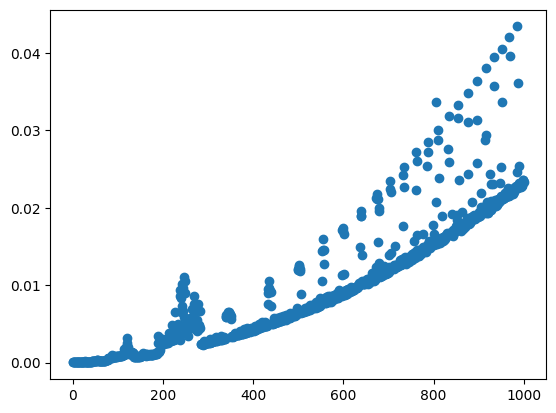

In [ ]:
plt.scatter(range(1, 1001), intentos)
plt.show()